# Imports

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

from wordcloud import WordCloud

# Загрузка 'Ice Cream' Dataset

Используется датасет с описанием разных продуктов (ice cream) разных бендов. Этот датасет разбит на датасет с информацией о продуктах, в том числе изображении, и на датасет с отзывами на них.

In [2]:
!wget -q 'https://www.dropbox.com/scl/fi/256sresvluia56zgb4cw3/ice_cream_dataset.tar.gz?rlkey=ne0mlx8vf6rdaz34cn33cil3p&dl=1' -O 'ice_cream.tar.gz'
!tar -zxf 'ice_cream.tar.gz'

# Работа с мультимодальным датасетом

Чтение датасета продуктах и датасета отзывов о них

In [125]:
products_df = pd.read_csv('products.csv', sep=';')
reviews_df = pd.read_csv('reviews.csv', sep=';').drop('brand', axis=1)

In [126]:
products_df.head()

,brand,key,name,description
0,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...
1,bj,1_bj,Netflix & Chilll'd™,There’s something for everyone to watch on Net...
2,bj,2_bj,Chip Happens,Sometimes “chip” happens and everything’s a me...
3,bj,3_bj,Cannoli,As a Limited Batch that captured the rapture o...
4,bj,4_bj,Gimme S’more!™,It’s a gimme: there’s always room for s’more. ...


In [127]:
reviews_df.head()

,key,author,date,title,text
0,0_bj,Ilovebennjerry,2017-04-15,Not enough brownies!,"Super good, don't get me wrong. But I came for..."
1,0_bj,Sweettooth909,2020-01-05,I’m OBSESSED with this pint!,I decided to try it out although I’m not a hug...
2,0_bj,LaTanga71,2018-04-26,My favorite...More Caramel Please,My caramel core begins to disappear about half...
3,0_bj,chicago220,2018-01-14,Obsessed!!!,Why are people complaining about the blonde br...
4,0_bj,Kassidyk,2020-07-24,Worst Ice Cream Ever!,This ice cream is worst ice cream I’ve ever ta...


Объединение датасетов, добавления столбца с ссылкой на изображение продукта в images/, а так же исключение всех строк, имеющих пустые значения

In [128]:
df = products_df.merge(reviews_df, on='key', how='inner')
df['image'] = 'images/' + df['key'] + '.png'
df = df.dropna()
df.head()

,brand,key,name,description,author,date,title,text,image
0,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...,Ilovebennjerry,2017-04-15,Not enough brownies!,"Super good, don't get me wrong. But I came for...",images/0_bj.png
1,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...,Sweettooth909,2020-01-05,I’m OBSESSED with this pint!,I decided to try it out although I’m not a hug...,images/0_bj.png
2,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...,LaTanga71,2018-04-26,My favorite...More Caramel Please,My caramel core begins to disappear about half...,images/0_bj.png
3,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...,chicago220,2018-01-14,Obsessed!!!,Why are people complaining about the blonde br...,images/0_bj.png
4,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...,Kassidyk,2020-07-24,Worst Ice Cream Ever!,This ice cream is worst ice cream I’ve ever ta...,images/0_bj.png


# Разметка

Для опредления тональности используем VADER (Valence Aware Dictionary and sEntiment Reasoner), который является популярным инструментом для анализа сентимента текста, особенно эффективным в контексте социальных сетей, отзывов пользователей и других форм коротких текстовых сообщений. Перед этим чистим сообщение.

In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

In [130]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word.lower() not in stop_words])

sia = SentimentIntensityAnalyzer()

def sentiment_category(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

df['combined_text'] = df['title'] + '. ' + df['text']
df['cleaned_text'] = df['combined_text'].apply(remove_stop_words)
df['sentiment_score'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_category'] = df['sentiment_score'].apply(sentiment_category)

In [131]:
df.head()

,brand,key,name,description,author,date,title,text,image,combined_text,cleaned_text,sentiment_score,sentiment_category
0,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...,Ilovebennjerry,2017-04-15,Not enough brownies!,"Super good, don't get me wrong. But I came for...",images/0_bj.png,"Not enough brownies!. Super good, don't get me...","enough brownies ! . Super good , n't get wrong...",0.9846,positive
1,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...,Sweettooth909,2020-01-05,I’m OBSESSED with this pint!,I decided to try it out although I’m not a hug...,images/0_bj.png,I’m OBSESSED with this pint!. I decided to try...,’ OBSESSED pint ! . decided try although ’ hug...,0.9535,positive
2,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...,LaTanga71,2018-04-26,My favorite...More Caramel Please,My caramel core begins to disappear about half...,images/0_bj.png,My favorite...More Caramel Please. My caramel ...,favorite ... Caramel Please . caramel core beg...,0.9056,positive
3,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...,chicago220,2018-01-14,Obsessed!!!,Why are people complaining about the blonde br...,images/0_bj.png,Obsessed!!!. Why are people complaining about ...,Obsessed ! ! ! . people complaining blonde bro...,0.9586,positive
4,bj,0_bj,Salted Caramel Core,Find your way to the ultimate ice cream experi...,Kassidyk,2020-07-24,Worst Ice Cream Ever!,This ice cream is worst ice cream I’ve ever ta...,images/0_bj.png,Worst Ice Cream Ever!. This ice cream is worst...,Worst Ice Cream Ever ! . ice cream worst ice c...,-0.7478,negative


### Примеры размеченных данных в связке с изобржаениями

In [138]:
def show_img(index):
  img = mpimg.imread(df.loc[index]['image'])

  plt.imshow(img)
  plt.axis('off')
  plt.show()

def show_review(index):
  return df.loc[[index]][['brand', 'name', 'author', 'title', 'text', 'sentiment_category']].transpose()

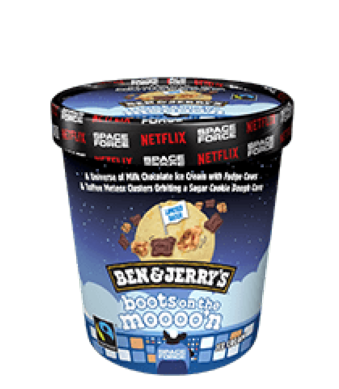

,3
brand,bj
name,Salted Caramel Core
author,chicago220
title,Obsessed!!!
text,Why are people complaining about the blonde br...
sentiment_category,positive


In [133]:
show_img(3)
show_review(3)

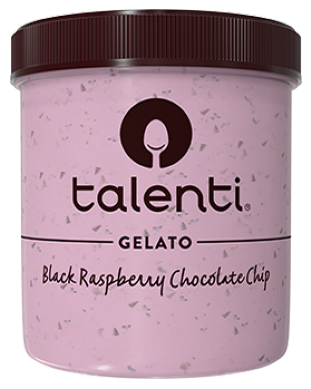

,8147
brand,talenti
name,BLACK RASPBERRY CHOCOLATE CHIP GELATO
author,idkok
title,Nasty
text,"Unfortunately, nasty is the first word that po..."
sentiment_category,negative


In [147]:
show_img(8147)
show_review(8147)

# EDA

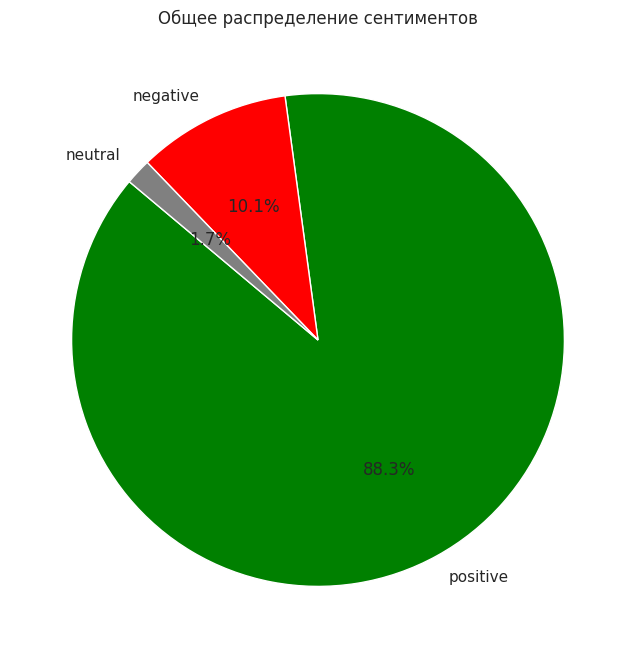

,Sentiment Category,Count
0,positive,10035
1,negative,1143
2,neutral,193


In [164]:
sentiment_counts_df = df['sentiment_category'].value_counts()
sentiment_counts_df = sentiment_counts_df.reset_index()
sentiment_counts_df.columns = ['Sentiment Category', 'Count']

plt.figure(figsize=(8, 8))
df['sentiment_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'])
plt.title('Общее распределение сентиментов')
plt.ylabel('')
plt.show()

sentiment_counts_df

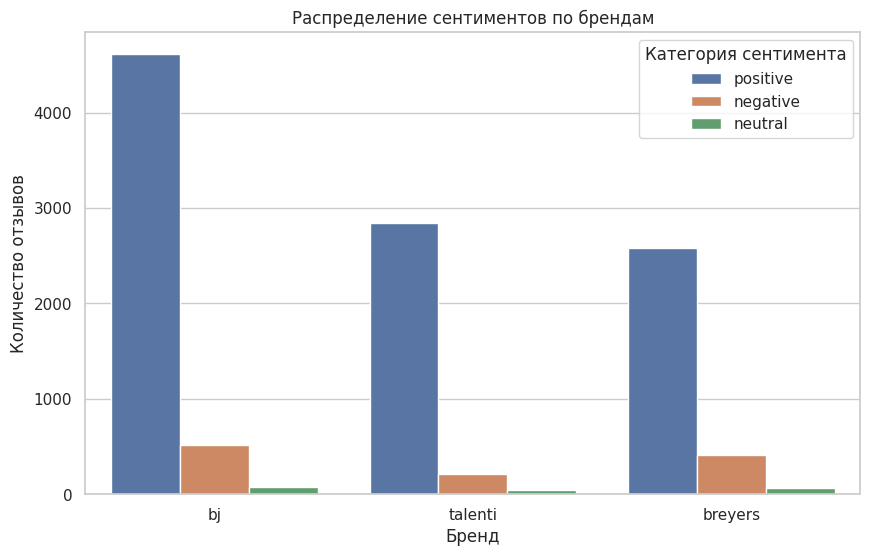

In [165]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='brand', hue='sentiment_category', data=df)
plt.title('Распределение сентиментов по брендам')
plt.xlabel('Бренд')
plt.ylabel('Количество отзывов')
plt.legend(title='Категория сентимента')
plt.show()

In [170]:
def plot_graph(brand):
  top_products = df[df['brand'] == brand]['name'].value_counts().head(20).index
  df_top_products = df[df['name'].isin(top_products)]

  plt.figure(figsize=(12, 8))
  sns.countplot(y='name', hue='sentiment_category', data=df_top_products)
  plt.title(f'Распределение сентиментов по продуктам бренда "{brand}"')
  plt.xlabel('Количество отзывов')
  plt.ylabel('Продукт')
  plt.legend(title='Категория сентимента')
  plt.show()

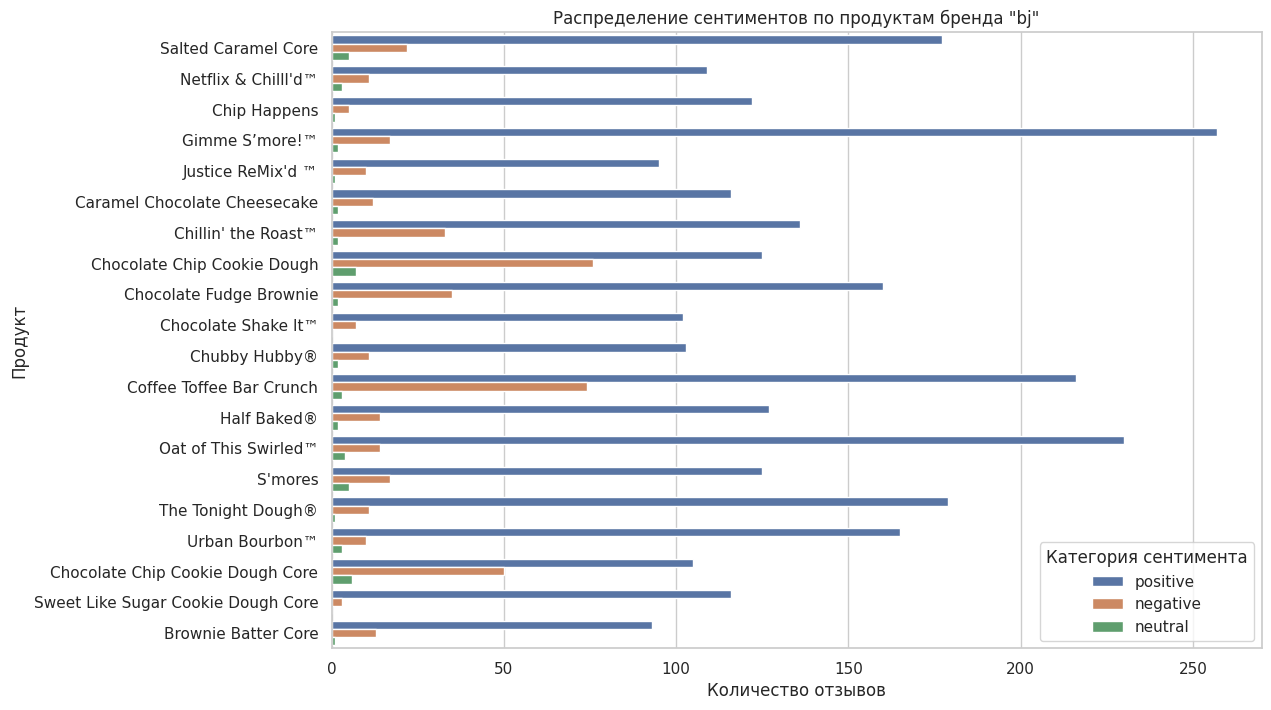

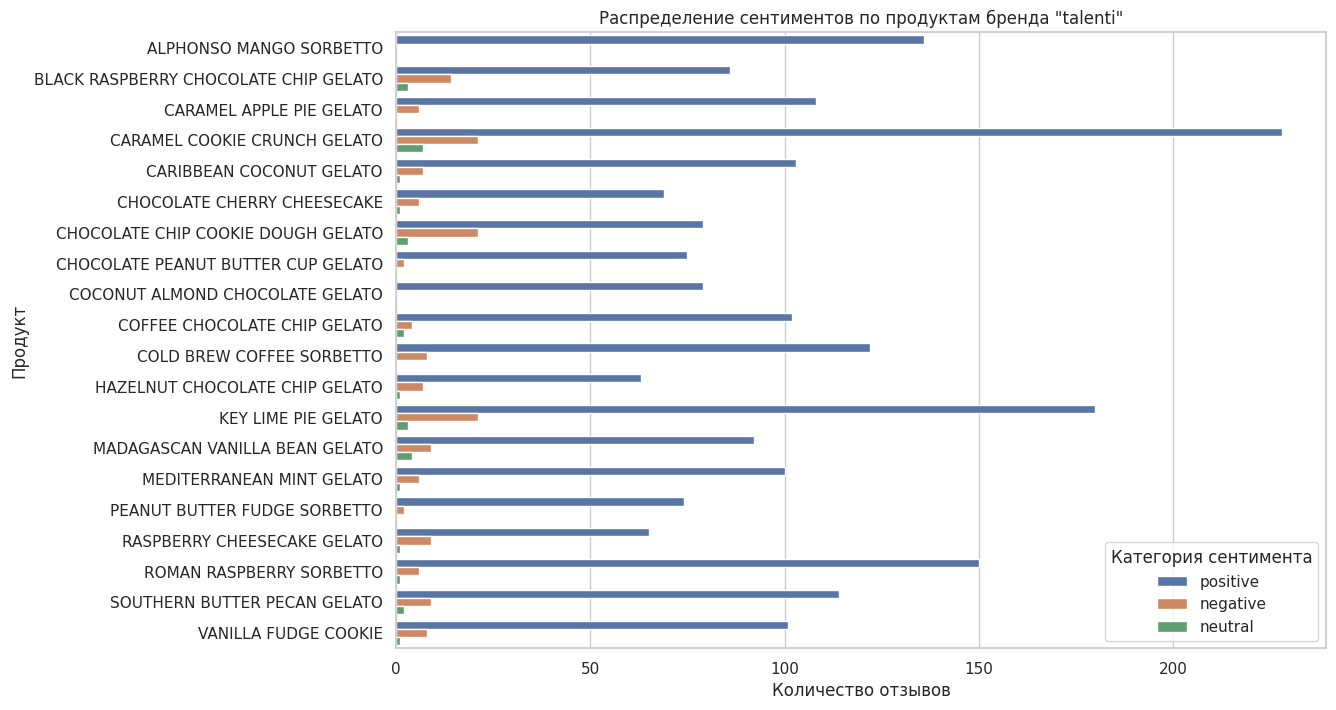

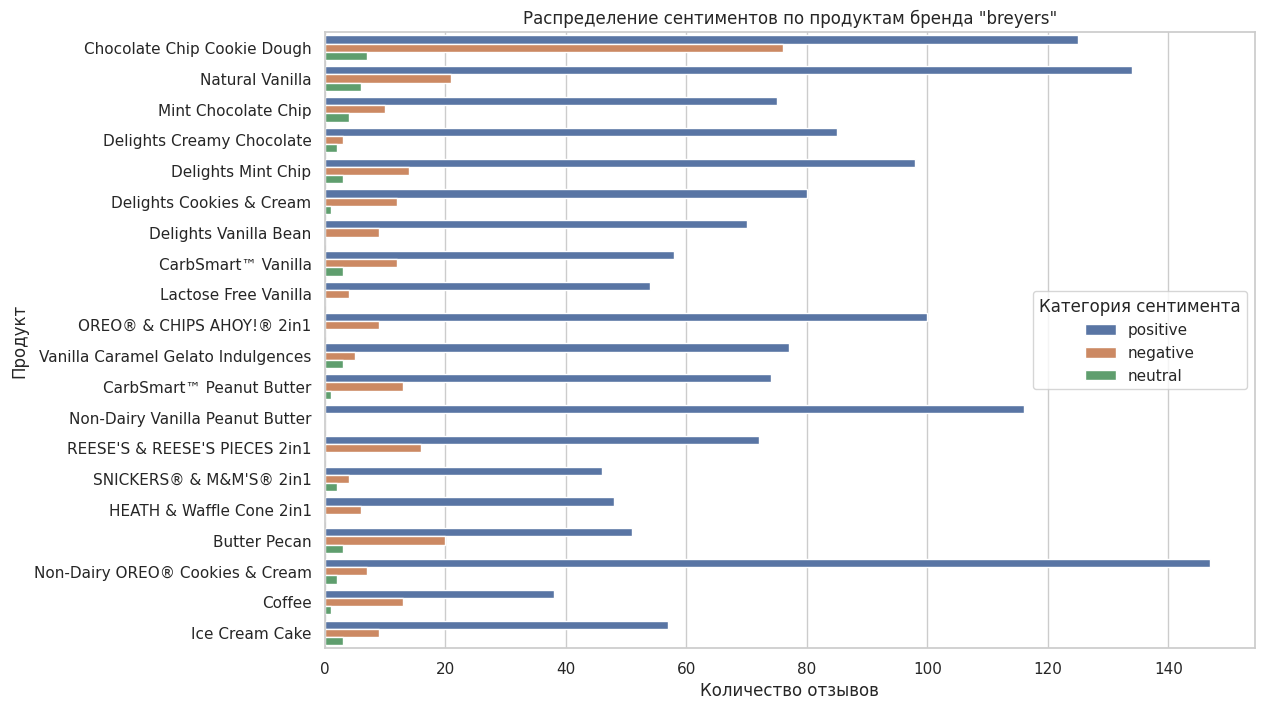

In [171]:
plot_graph('bj')
plot_graph('talenti')
plot_graph('breyers')

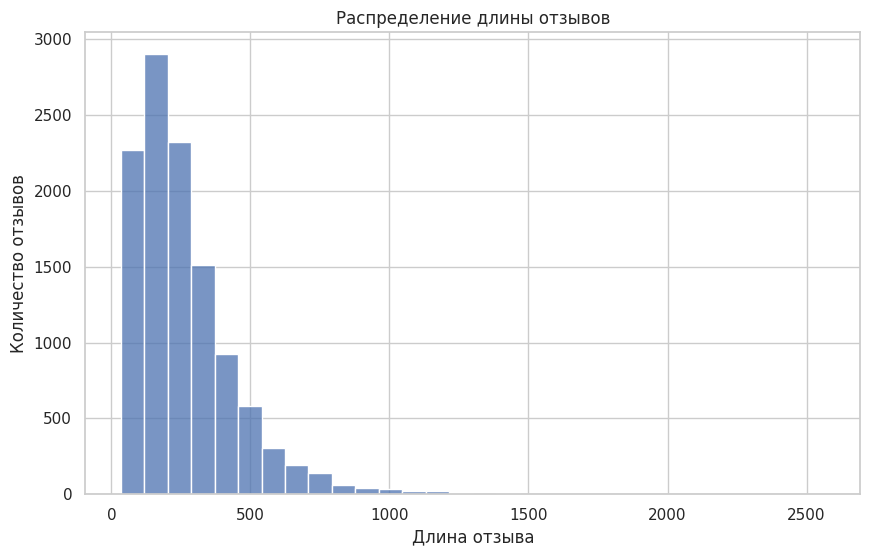

In [167]:
df['review_length'] = df['combined_text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=False)
plt.title('Распределение длины отзывов')
plt.xlabel('Длина отзыва')
plt.ylabel('Количество отзывов')
plt.show()

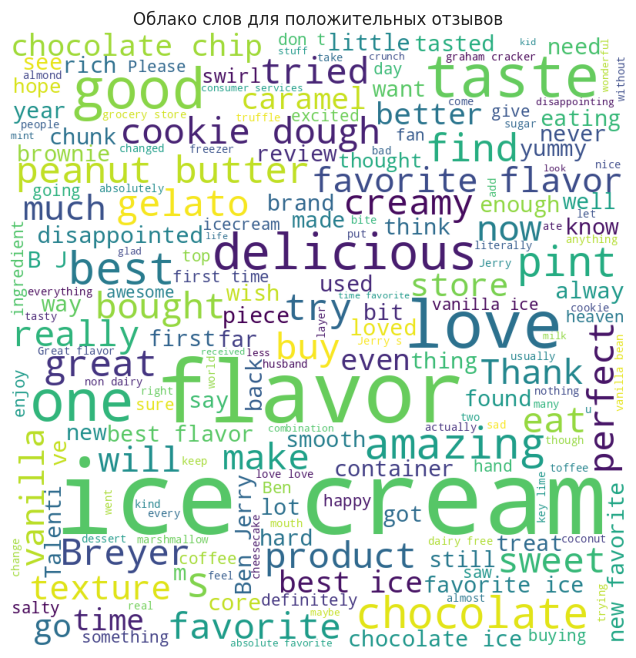

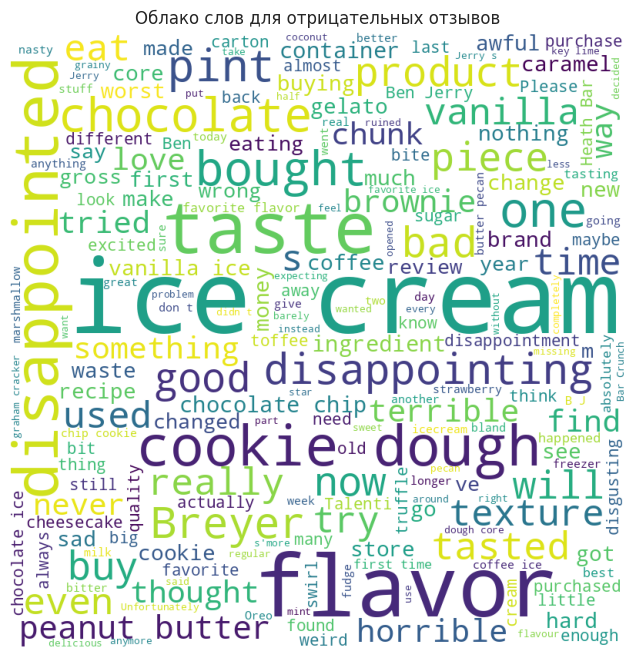

In [168]:
positive_text = ' '.join(df[df['sentiment_category'] == 'positive']['combined_text'])
negative_text = ' '.join(df[df['sentiment_category'] == 'negative']['combined_text'])

plt.figure(figsize=(10, 8))
positive_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(positive_text)
plt.imshow(positive_wordcloud)
plt.title('Облако слов для положительных отзывов')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 8))
negative_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(negative_text)
plt.imshow(negative_wordcloud)
plt.title('Облако слов для отрицательных отзывов')
plt.axis('off')
plt.show()

# Итоги

После работы с датасетами получили мультимодальный датасет с sentiment scores и sentiment categroies. Возможны следующие кейсы использования:

1. **Рекомендательные Системы**: Используя данные отзывов и изображений, можно создать более эффективные рекомендательные системы, которые учитывают как текстовые отзывы, так и визуальные предпочтения пользователей.

2. **Автоматическое Определение Трендов**: Анализ комбинации текстовых отзывов и изображений может помочь в выявлении трендов и предпочтений потребителей, например, какие вкусы мороженого или виды упаковки становятся более популярными.
3. **Улучшение Управления Продуктом и Брендом**: Анализ отзывов и изображений может дать компаниям ценную обратную связь о своих продуктах, что позволит улучшить качество продукции, дизайн упаковки или маркетинговые стратегии.
4. **Обучение Кросс-модальных Моделей**: Мультимодальные данные могут быть использованы для обучения моделей, которые способны одновременно работать с текстом и изображениями. Такие модели могут найти применение в автоматизированном контент-анализе, цифровом маркетинге и других областях.
5. **Интерактивные Рекламные Кампании**: Анализируя отзывы и изображения, компании могут создавать более персонализированные и эффективные рекламные кампании, нацеленные на определенные группы потребителей.
6. **Контент-Генерация и Автоматизация**: Использование данных для автоматической генерации описаний продуктов или рекламных материалов, которые учитывают как текст, так и визуальный контент.